In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('mnist-original')

In [6]:
mnist.data.shape

(70000, 784)

In [7]:
X, y= mnist['data'], mnist['target']

In [8]:
X.shape, y.shape

((70000, 784), (70000,))

In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

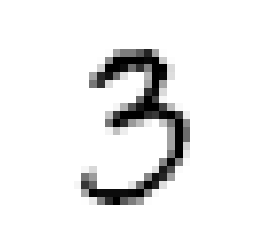

In [26]:
plt.imshow(X[20000].reshape(28, 28), cmap=cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [27]:
y[20000]

3.0

In [28]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [32]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [33]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

In [34]:
import numpy as np

In [35]:
shuffle_index = np.random.permutation(60000)

In [36]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [38]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [39]:
from sklearn.linear_model import SGDClassifier

In [40]:
sgd_clf = SGDClassifier(random_state=42)

In [41]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [42]:
sgd_clf.score(X_test, y_test_5)

0.95450000000000002

In [43]:
from sklearn.model_selection import StratifiedKFold

In [44]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [48]:
for train_idex, test_idx in skfolds.split(X_train, y_train_5):
    sgd = SGDClassifier(random_state=42)
    X_train_folds = X_train[train_idex]
    y_train_folds = y_train_5[train_idex]
    X_test_folds = X_train[test_idx]
    y_test_folds = y_train_5[test_idx]
    
    sgd.fit(X_train_folds, y_train_folds)
    y_pred = sgd.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

0.96725
0.89975
0.95435


In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.96725,  0.89975,  0.95435])

In [50]:
from sklearn.model_selection import cross_val_predict

In [51]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [59]:
X_train.shape

(60000, 784)

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_train_5, y_train_pred)

array([[52488,  2091],
       [ 1482,  3939]])

In [54]:
from sklearn.metrics import precision_score, recall_score

In [56]:
precision_score(y_train_5, y_train_pred)

0.65323383084577114

In [57]:
recall_score(y_train_5, y_train_pred)

0.72661870503597126

In [60]:
from sklearn.metrics import f1_score

In [62]:
f1_score(y_train_5, y_train_pred)

0.68797484935813469

In [63]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [64]:
from sklearn.metrics import precision_recall_curve

In [67]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

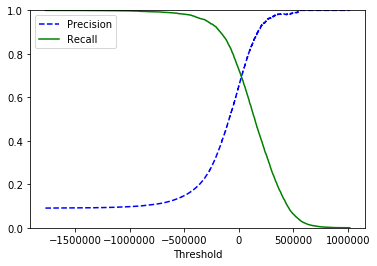

In [68]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

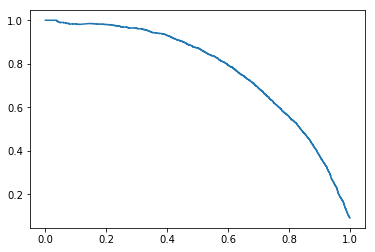

In [69]:
plt.plot(recalls, precisions)

In [70]:
from sklearn.metrics import roc_curve

In [71]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

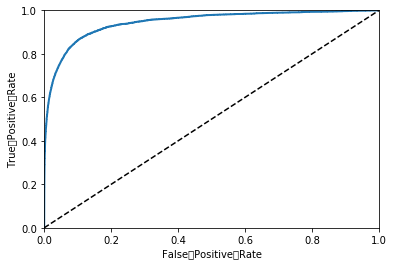

In [72]:
def	plot_roc_curve(fpr,	tpr,	label=None):
				plt.plot(fpr,	tpr,	linewidth=2,	label=label)
				plt.plot([0,	1],	[0,	1],	'k--')
				plt.axis([0,	1,	0,	1])
				plt.xlabel('False	Positive	Rate')
				plt.ylabel('True	Positive	Rate')
plot_roc_curve(fpr,	tpr)
plt.show()

In [73]:
from	sklearn.metrics	import	roc_auc_score

In [74]:
roc_auc_score(y_train_5,	y_scores)

0.94504427154782455